In [1]:
#Checking for Dataset
import os
print(os.getcwd())
if len(os.listdir('Dataset/'))==0:
    print("Dataset not available...")
else:
    os.chdir("Dataset/")
    print(os.listdir())

E:\Projects\Pubg-Competition
['sample_submission_V2.csv', 'test_V2.csv', 'train_V2.csv']


In [2]:
#Importing Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(2)
from sklearn.preprocessing import normalize 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam

C:\Users\Piyush\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#Loading Data
data_df=pd.read_csv('train_V2.csv')
test_data_df=pd.read_csv('test_V2.csv')

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [5]:
pd.set_option('display.max_columns', None)
print(data_df.head(10))

               Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
5  ff79c12f326506  289a6836a88d27  bac52627a12114        0       0   
6  95959be0e21ca3  2c485a1ad3d0f1  a8274e903927a2        0       0   
7  311b84c6ff4390  eaba5fcb7fc1ae  292611730ca862        0       0   
8  1a68204ccf9891  47cfbb04e1b1a2  df014fbee741c6        0       0   
9  e5bb5a43587253  759bb6f7514fd2  3d3031c795305b        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
0        0.000      0              0      0         60        1241      0   
1       91.470      0              0      0         57           0      0  

In [6]:
data_df.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


In [7]:
#Filling NaN with 0
data_df=data_df.fillna(0)
data_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [8]:
#Getting number of unique Matches, Groups and Players
for c in ['Id','groupId','matchId']:
    print(f'unique [{c}] count:', data_df[c].nunique())

unique [Id] count: 4446966
unique [groupId] count: 2026745
unique [matchId] count: 47965


Number of different MatchTypes: 16


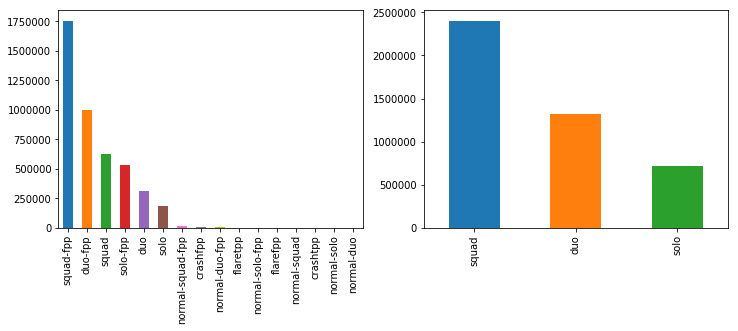

In [9]:
#Plotting MatchTypes
print("Number of different MatchTypes:", data_df['matchType'].nunique())

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
data_df['matchType'].value_counts().plot.bar(ax=ax[0])
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
data_df['matchType'].apply(mapper).value_counts().plot.bar(ax=ax[1])

In [10]:
#Totalling the distance
data_df['totalDistance']=data_df['rideDistance']+data_df['walkDistance']+data_df['swimDistance']
test_data_df['totalDistance']=test_data_df['rideDistance']+test_data_df['walkDistance']+test_data_df['swimDistance']

data_df=data_df.drop(columns=['walkDistance','swimDistance','rideDistance'])
test_data_df=test_data_df.drop(columns=['walkDistance','swimDistance','rideDistance'])

In [11]:
data_df=data_df.drop(columns=['longestKill','Id','groupId','matchId','killPoints','matchDuration','rankPoints','winPoints'])
test_data_df=test_data_df.drop(columns=['longestKill','Id','groupId','matchId','killPoints','matchDuration','rankPoints','winPoints'])

In [13]:
'''
#converting matchType to oneHot
one_hot = pd.get_dummies(data_df['matchType'], drop_first=True)
data_df=data_df.join(one_hot)

one_hot = pd.get_dummies(test_data_df['matchType'], drop_first=True)
test_data_df=test_data_df.join(one_hot)
'''

"\n#converting matchType to oneHot\none_hot = pd.get_dummies(data_df['matchType'], drop_first=True)\ndata_df=data_df.join(one_hot)\n\none_hot = pd.get_dummies(test_data_df['matchType'], drop_first=True)\ntest_data_df=test_data_df.join(one_hot)\n"

In [12]:
data_df=data_df.drop(columns=['matchType','boosts','killStreaks','roadKills','teamKills','weaponsAcquired','numGroups','vehicleDestroys'])
test_data_df=test_data_df.drop(columns=['matchType','boosts','killStreaks','roadKills','teamKills','weaponsAcquired','numGroups','vehicleDestroys'])

In [13]:
data_df.head()

,assists,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,maxPlace,revives,winPlacePerc,totalDistance
0,0,0.00,0,0,0,60,0,28,0,0.4444,244.8000
1,0,91.47,0,0,0,57,0,26,0,0.6400,1445.0445
2,1,68.00,0,0,0,47,0,50,0,0.7755,161.8000
3,0,32.90,0,0,0,75,0,31,0,0.1667,202.7000
4,0,100.00,0,0,0,45,1,97,0,0.1875,49.7500


In [14]:
test_data_df.head()

,assists,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,maxPlace,revives,totalDistance
0,0,51.46,0,0,0,73,0,28,0,588.0
1,0,179.10,0,0,2,11,2,48,2,6686.0
2,1,23.40,0,0,4,49,0,28,0,787.8
3,0,65.52,0,0,0,54,0,45,0,1812.0
4,0,330.20,1,2,1,7,3,28,1,2963.0


In [15]:
#Converting Dataframes to numpy array
y_train=data_df['winPlacePerc'].ravel()
train=data_df.drop(['winPlacePerc'], axis=1)
X_train=train.values
X_test=test_data_df.values
print(X_train.shape,"X_train")
print(y_train.shape,"y_train")
print(X_test.shape,"X_test")

(4446966, 10) X_train
(4446966,) y_train
(1934174, 10) X_test


In [16]:
#Normalizing the Data
X_test = normalize(X_test, axis=0, norm='max')
X_train = normalize(X_train, axis=0, norm='max')

In [17]:
#Defining the model
adam=Adam(lr=0.0001)
model=Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=adam, loss='mse', metrics=['mae'])

In [ ]:
#Training the model
model.fit(X_train, y_train, epochs=10, batch_size=10000, validation_split=0.2, shuffle=True)

Train on 3557572 samples, validate on 889394 samples
Epoch 1/10
 730000/3557572 [=====>........................] - ETA: 3s - loss: 0.0159 - mean_absolute_error: 0.0946

In [24]:
#Predicting and Creating the Submission
sub=pd.read_csv('test_V2.csv', index_col='Id')
predictions = model.predict(X_test).reshape(-1,1)
dfpredictions = pd.DataFrame(predictions, index=sub.index).rename(columns={0:'winPlacePerc'})
dfpredictions.to_csv('submission.csv', header=True)